# Numerical Lab (1): Random number generation, histograms, and central limit theorem

In this numerical "lab" (NLab) you will explore how to generate random numbers in python, plot histograms, and explore central limiting behavior for sums of large numbers of idependent and identically distributed (iid) random variables (RV's).

Your first task is to make sure you have a working python and jupyter installation and succesfully run the cells in the "Quickstart Example:..." section, which shows a simple example of how to generate random numbers and plot histograms using pyplot.

After this, please write your own code to fill in the cells below according to the instructions and comments.

## Some important details:
You should turn in: a PDF of your completed jupyter notebook. Please be sure that you have successfully run all the code and that the appropriate plots are showing in your jupyter notebook.

If you prefer to use another programming language, you will have to figure out how to generate an equivalent document (there are jupyter interfaces for many programming languages, or for example you can make a latex doc with an equivalent structure).

When writing code in Python, you should avoid (if at all possible) using for loops to do computations on arrays with many elements. Instead, you should use "vectorized" commands in numpy. For example, to sum over elements of an array, use the np.sum(...) command. Vectorized commands run in precompiled code that is much faster than the interpreted python scripts. If you are new to python, for a few examples of how to vectorize code, please see: https://www.geeksforgeeks.org/vectorization-in-python/ 

# Quickstart Example: Sampling Random Numbers and Plotting Histograms
The following two cells show an example of how to generate random numbers using numpy and plot a histogram using pyplot. Make sure you can successfully run these cells and generate the plot before working on the rest of the assignment.

In [1]:
# Imports
import numpy as np # numerical computing package for manipulating arrays and many other common mathematical functions
import matplotlib.pyplot as plt # plots

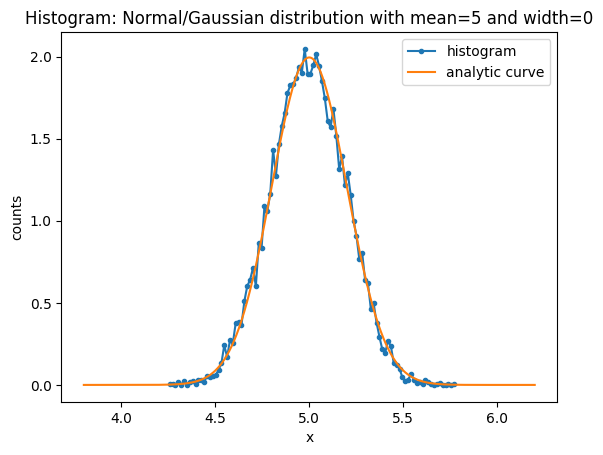

In [2]:
# Sample random variables from a distribution
N_s = 1000 # number of samples

# uniform distribution
#X = np.random.rand(N_s) # array of random samples from uniform distribution on [0,1]

N_points = 10000
n_bins = 100

# Generate a normal distributions
mu=5 # mean
sigma=0.2 # RMS variance ("width")
X = sigma * np.random.randn(N_points) + mu # custom mean and variance

# Gaussian curve
xs = np.linspace(mu-6*sigma,mu+6*sigma,N_points)
p_gauss = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(xs-mu)**2/(2*sigma**2))

#plt.hist(X,bins=n_bins)
counts,bins = np.histogram(X,
                           bins=n_bins, # custom nubmer of bins
                          density=True # make normalized probability distribution rather than counts per bin
                          )
plt.plot(bins[:-1], counts,'.-')
plt.plot(xs,p_gauss)
#plt.ylim([0,np.max(p_gauss)+1])
plt.title('Histogram: Normal/Gaussian distribution with mean=%0.f and width=%0.f'%(mu,sigma))
plt.xlabel('x')
plt.ylabel('counts')
plt.legend(['histogram','analytic curve'])
plt.show()

# Sums of random variables
Define the R.V., $Y$ to be the mean of $N$ R.V.'s $X_i$, $i=1\dots N$: $$Y=\frac{1}{N}\sum_{i=1}^N X_i$$ where $N$ is an integer and 
with $X_i$ are i.i.d random variables drawn from the uniform distribution on the interval $[-1,1]$

## Sampling and Histograms

### Histogram of $X_i$
Plot a histogram of 10^4 samples of one of the R.V.s, $X_i$ that enter the sum defining $Y$.

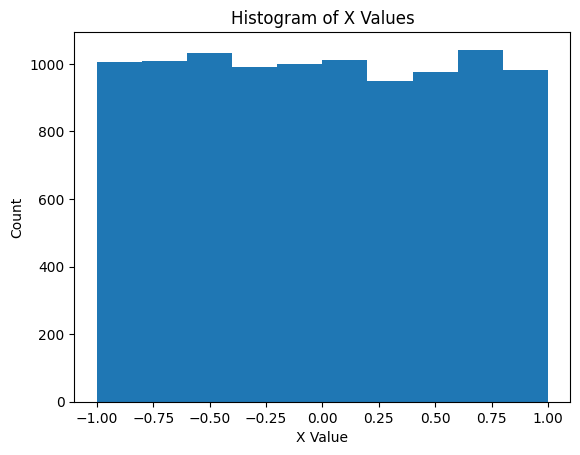

In [3]:
# Produce N_samples = 10000 of X and plot a histogram
N = 10000
X = np.random.uniform(-1, 1, N)
plt.hist(X)
plt.title("Histogram of X Values")
plt.xlabel('X Value')
plt.ylabel('Count')
plt.show()

### Write a function to generate samples of Y

Note: In python, this function should not contain any for loops! Instead, create a numpy array of with N_sample rows and N columns, and use np.mean() or np.sum() functions (check out the numpy docs: https://numpy.org/doc/stable/reference/generated/numpy.sum.html to see average or sum over only the rows or columns of the array using these commands)

In [4]:
# fill in the body of the function with your own code
def sampleY(N,N_samples):
    """
    returns N_samples of Y = 1/N*\sum_{i=1}^N X_i with X_i i.i.d. ~ [-1,1]
    inputs:
    - N, int: parameter in definition of Y
    - N_samples, int: number of samples to return
    outpus:
    - Y, np.array of shape (N_samples,): samples of Y
    """
    # complete the code for this function...

    X = np.random.uniform(-1, 1, (N_samples, N))
    Y = X.sum(axis=1) / N
    
    return Y

In [5]:
np.max(sampleY(1, 100000))

0.9999877068184511

### Plot a histogram of Y
Using your function above with: N=1,2,3,10,100, and N_samples=100000
also plot a gaussian distribution with mean = mean of X_i and variance = variance(X_i)/N.

Note: when writing and debugging your code you may want to turn down N_samples to a much lower number so that you can quickly iterate.

Note how the histogram becomes closer and closer to Gaussian as N becomes large (this is the central limit theorem)

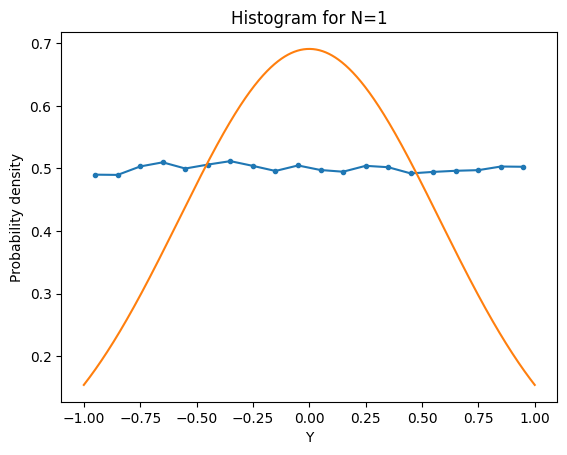

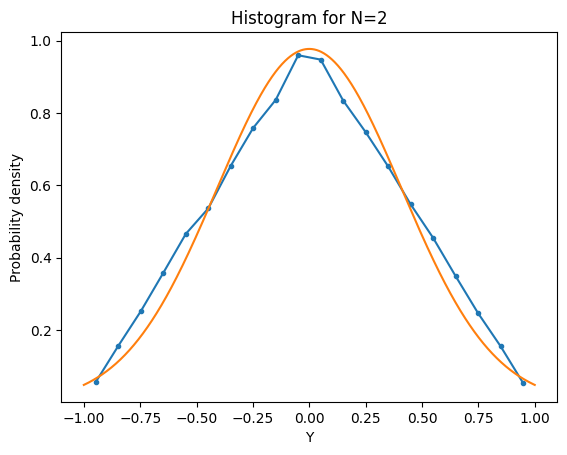

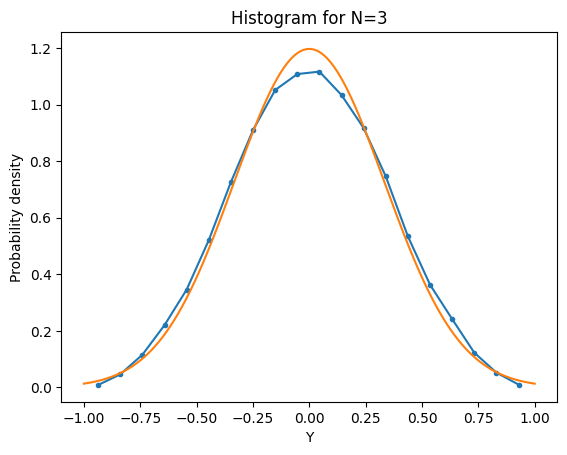

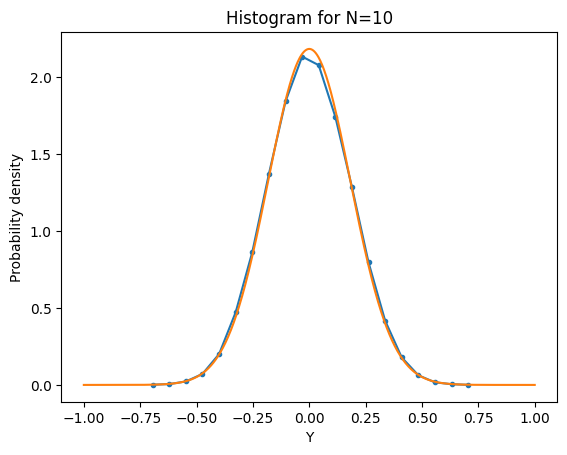

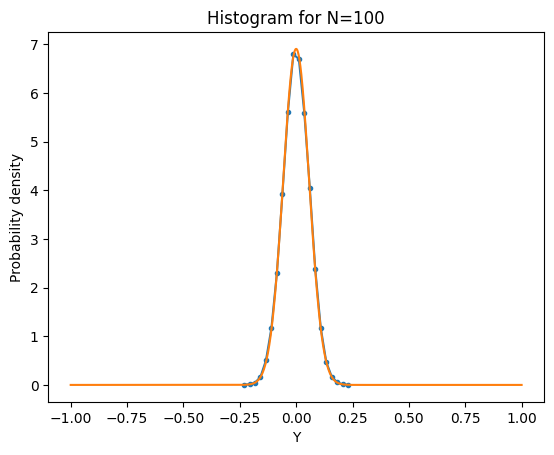

In [6]:
N_samples = 100000
for N in [1,2,3,10,100]:
    plt.figure()
    # draw N_samples of Y for this N samples using the sampleY function
    Y = sampleY(N, N_samples)

    mu = 0
    sigma = np.sqrt(1/3/N)
    
    xs = np.linspace(-1,1,1000)
    p_gauss = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(xs-mu)**2/(2*sigma**2))
    counts,bins = np.histogram(Y,
        bins=20,
        density=True
    )
    plt.plot((bins + np.roll(bins, -1))[:-1] / 2, counts,'.-')
    plt.plot(xs, p_gauss)
    plt.title(f"Histogram for N={N}")
    plt.xlabel("Y")
    plt.ylabel("Probability density")

    # plot a normalized histogram of Y, in a separate panel for each N
    # be sure to label all plots and axes

## Kurtosis
We can quantify the deviation of the distribution for $Y$ from a Gaussian distribution by looking at the Kurtosis, defined by:
$$ {\rm Kurtosis(Y)} = \frac{\langle Y^4\rangle_c}{\langle Y^2\rangle^2}$$

For a Gaussian distribution, the pth cumulant with p>2 vanishes, so non-zero Kurtosis measures deviation from Gaussian-ness.

To estimate the moments and cumulants of $Y$, draw N_sample = 10^6 samples of Y: $\{Y_i\}_{i=1\dots N_{samples}}$, and estimate expectation values of functions of $Y$ as: $$\langle f(Y) \rangle \approx \frac{1}{N_{samples}}\sum_{i=1}^{N_{samples}} f(Y_i)$$ where $f(\circ)$ is any function of the R.V. $Y$.

A large number of samples is required to get an accurate estimate of the kurtosis since the numerator and denomenator are both decreasing with N (even with 10^6 samples, your curve will still have quite a bit of statistical noise for the large N's). To improve the statistical estimates, use the symmetry under $Y\rightarrow -Y$ to explicitly set odd power moments and cumulants to zero. In particular: you should set $\langle Y\rangle=0$ explicitly rather than numerically estimating it.



### Plot Kurtosis
Compute and plot the absolute value of the Kurtosis versus N for the list of Ns provided in the cell below 

show your results on a log-log plot

also plot the curve 1/N on the same plot and notice that it has the same slope at large N

In [53]:
N_samples = 1000000
Ns= np.array([j for j in range(1,10)]+[j for j in range(10,100,10)]+[j for j in range(100,1000,100)])

# compute the kurtosis
Y = np.array([sampleY(N, N_samples) for N in Ns])


In [54]:
Y.shape

(27, 1000000)

In [55]:
Y2 = (Y**2).mean(axis=1)
Y4 = (Y**4).mean(axis=1)
K = Y4 / Y2**2 - 3

In [56]:
K

array([-1.19964198e+00, -5.97336147e-01, -3.95475084e-01, -2.99145575e-01,
       -2.36821198e-01, -1.96459418e-01, -1.73291896e-01, -1.58787150e-01,
       -1.23614120e-01, -1.28085060e-01, -7.18194475e-02, -3.84513157e-02,
       -3.52841981e-02, -2.37727493e-02, -2.51497045e-02, -2.33676899e-02,
       -2.49835843e-02, -9.61191028e-03, -1.68337317e-02, -6.37060892e-04,
       -5.93431940e-03, -5.69592976e-03,  7.69462269e-04, -5.03613743e-03,
        3.39128293e-03, -1.11706337e-03,  3.34415684e-04])

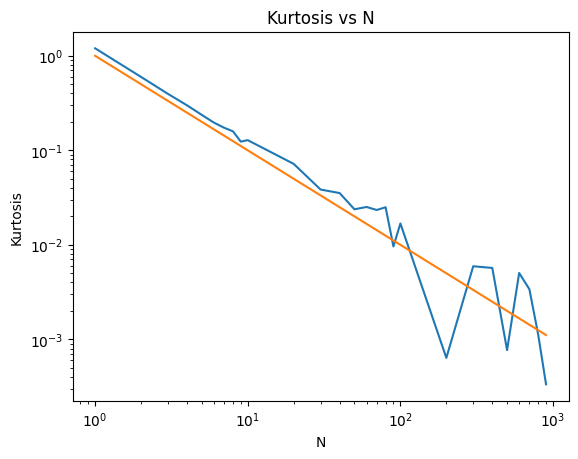

In [57]:
# plot the kurtosis vs N and also plot 1/N
# be sure to put axis labels and legend
""" note, it's good practice to put the plot code in a separate cell 
from the computation when the computation takes a signficant amount of time
otherwise, if you want to change a tiny formatting thing on the plot you have to 
run the computation all over again!
""" 
plt.loglog(Ns, np.abs(K), label="Kurtosis")
plt.loglog(Ns, 1/Ns, label="1/N")
plt.title("Kurtosis vs N")
plt.xlabel("N")
plt.ylabel("Kurtosis")
plt.show()
